# Escola de Inverno - IESP-UERJ - 2023

## Introdução à Ciência de Dados
Matheus C. Pestana

### Raspando dados da Web

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import json
from tqdm import tqdm

url = 'https://www.brasilparalelo.com.br/search?query=lula'
r = requests.get(url)
r = r.content

soup = BeautifulSoup(r, 'lxml')

In [ ]:
noticias = soup.find_all('div', {'class': 'search-result-item'})
noticias

for noticia in noticias:
  print(f'Título: {noticia.text}')
  print(f"URL: {noticia.find('a').get('href')}")
  print('\n')

Título: 
Lula é comunista?As falas do presidente em entrevista recente e na abertura do Foro de São Paulo repercutiram negativamente.
URL: /noticias/na-mesma-semana-lula-afirma-ter-orgulho-de-ser-chamado-de-comunista-e-que-o-conceito-de-democracia-e-relativo


Título: 
Gilmar Mendes rebate LulaAs falas do Ministro e do presidente se referem ao caso venezuelano.
URL: /noticias/conceito-de-democracia-nao-e-relativo-afirma-o-ministro-do-stf-gilmar-mendes-em-resposta-ao-presidente-lula


Título: 
Reações às declarações de LulaPresidentes de países sul-americanos criticaram o presidente Lula por afirmar que ditadura na Venezuela não passa de "narrativa".
URL: /noticias/declaracoes-de-lula-sobre-maduro-desagradam-lideres-sul-americanos-de-diferentes-filiacoes-politicas


Título: 
Quem vaiou Lula em Portugal?Cidadãos e parlamentares portugueses manifestaram oposição a Lula, chamando-o de “ladrão” e de “amigo de ditadores comunistas”.
URL: /noticias/quem-vaiou-lula-em-portugal


Título: 
Lula 

In [ ]:
news = []
for noticia in noticias:
    titulo = noticia.find('h2').text
    descricao = noticia.find('p').text
    link = 'https://www.brasilparalelo.com.br' + noticia.find('a').get('href')
    if not 'episodios-programas' in link and not 'colunas' in link:
        r = requests.get(link)
        pagina = BeautifulSoup(r.content, 'lxml')

        tipo = pagina.find('div', {'class': 'reading-time-type'})
        tipo = tipo.text

        tempo_leitura = pagina.find('div', {'id': 'reading-time'})
        tempo_leitura = tempo_leitura.text

        temas = pagina.find_all('div', {'class': 'noticia-tag-dot'})
        temas = [tema.text for tema in temas]
        if len(temas) == 0:
            temas = pagina.find('div', {'class': 'noticia-tag'})
            temas = temas.text

        data_pub = pagina.find('span', {'class': 'published-at'})
        data_pub = data_pub.text

        materia = pagina.find('div', {'class': 'w-richtext'})
        materia = materia.text

        dados = {'titulo': titulo, 'descricao': descricao, 'link': link, 'tipo': tipo,
                 'tempo_leitura': tempo_leitura, 'temas': temas, 'data_pub': data_pub,
                 'materia': materia}
    news.append(dados)

pd.DataFrame(news)

,titulo,descricao,link,tipo,tempo_leitura,temas,data_pub,materia
0,Lula é comunista?,As falas do presidente em entrevista recente e...,https://www.brasilparalelo.com.br/noticias/na-...,Notícia,3,"[Brasil, Política, PT]",,Em meio às polêmicas da presença do Foro de Sã...
1,Gilmar Mendes rebate Lula,As falas do Ministro e do presidente se refere...,https://www.brasilparalelo.com.br/noticias/con...,Notícia,3,"[Política, Brasil, Venezuela]",,"O ministro Gilmar Mendes, do Supremo Tribunal ..."
2,Reações às declarações de Lula,Presidentes de países sul-americanos criticara...,https://www.brasilparalelo.com.br/noticias/dec...,Notícia,3,"[Brasil, Venezuela, Política]",,"Na terça-feira, o presidente Luiz Inácio Lula ..."
3,Quem vaiou Lula em Portugal?,Cidadãos e parlamentares portugueses manifesta...,https://www.brasilparalelo.com.br/noticias/que...,Notícia,3,"[Lula, Política, Brasil]",,O presidente Luiz Inácio Lula da Silva foi con...
4,Lula e Maduros Trocarão Informações Sigilosos,O anúncio do acordo foi feito após a visita do...,https://www.brasilparalelo.com.br/noticias/ali...,Notícia,3,"[Venezuela, Ditadura, Internacional]",,"Durante a visita de Maduro ao Brasil, Lula e o..."
5,Avaliação dos 100 dias de governo Lula,"Nesta segunda-feira, o atual presidente chega ...",https://www.brasilparalelo.com.br/noticias/lul...,Notícia,3,"[Política, PT, Brasil]",,O presidente Luiz Inácio Lula da Silva (PT) co...
6,Lula diz que mandato presidencial é curto,A fala foi proferida em live na última terça-f...,https://www.brasilparalelo.com.br/noticias/pre...,Notícia,3,"[Brasil, Política]",,“O problema é que o mandato é muito curto (......
7,Cúpula da CNBB se reúne com Lula,Bispos da CNBB foram recebidos no Palácio da A...,https://www.brasilparalelo.com.br/noticias/lul...,Notícia,3,"[Política, Lula, Brasil]",,"Nesta segunda-feira (19/06), os Bispos dirigen..."
8,Lula fornecerá R$4 bilhões para Argentina,Lula se encontrará novamente com o presidente ...,https://www.brasilparalelo.com.br/noticias/lul...,Notícia,3,"[Brasil, Argentina , Economia]",,"Hoje (26/06), Alberto Fernandez, presidente da..."
9,Lula agradece africanos pelos 350 anos de escr...,A fala repercutiu negativamente nas redes soci...,https://www.brasilparalelo.com.br/noticias/em-...,Notícia,3,"[Brasil, Escravidão, História do Brasil]",,"Em visita ao país africano Cabo Verde, o presi..."


# Usando APIs

## YahooFinance

<Axes: xlabel='Date', ylabel='Close'>

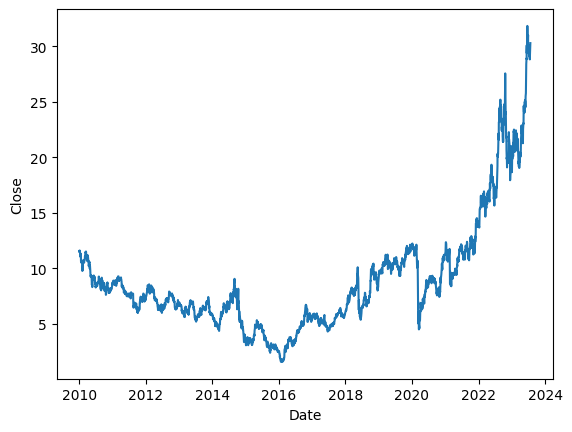

In [ ]:
import yfinance as yf
import seaborn as sns

petrobras = yf.Ticker('PETR4.SA')
petrobras_preco = petrobras.history(start = '2010-01-01', end = '2023-08-23')

sns.lineplot(petrobras_preco, y='Close', x='Date')

<Axes: xlabel='Date', ylabel='Close'>

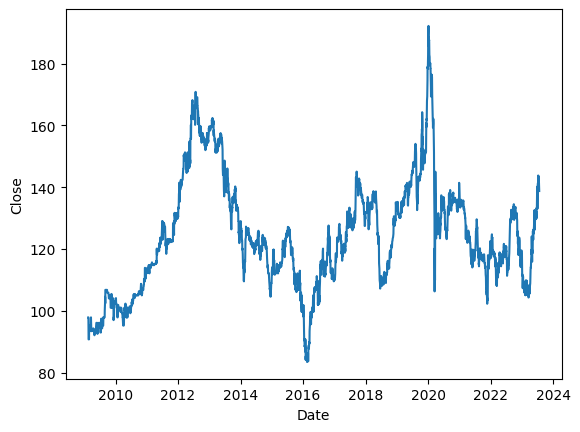

In [ ]:
hgre = yf.Ticker('HGRE11.SA')
hgre_preco = hgre.history(period='max')

sns.lineplot(hgre_preco, x='Date', y='Close')

In [ ]:
hgre.dividends

Date
2017-11-01 00:00:00-02:00    0.94
2017-12-01 00:00:00-02:00    0.94
2022-04-01 00:00:00-03:00    0.69
2022-05-02 00:00:00-03:00    0.78
2022-06-01 00:00:00-03:00    0.78
2022-07-01 00:00:00-03:00    0.78
2022-08-01 00:00:00-03:00    0.78
2022-09-01 00:00:00-03:00    0.78
2022-10-03 00:00:00-03:00    0.78
2022-11-01 00:00:00-03:00    0.78
2022-12-01 00:00:00-03:00    0.78
2023-01-02 00:00:00-03:00    1.10
2023-02-01 00:00:00-03:00    0.78
2023-03-01 00:00:00-03:00    0.78
2023-04-03 00:00:00-03:00    0.78
2023-05-02 00:00:00-03:00    0.78
2023-06-01 00:00:00-03:00    0.78
2023-07-03 00:00:00-03:00    1.40
Name: Dividends, dtype: float64

### Câmara dos Deputados

In [ ]:
url = 'https://dadosabertos.camara.leg.br/api/v2/deputados'

r = requests.get(url)
r = r.json()
r

{'dados': [{'id': 220593,
   'uri': 'https://dadosabertos.camara.leg.br/api/v2/deputados/220593',
   'nome': 'Abilio Brunini',
   'siglaPartido': 'PL',
   'uriPartido': 'https://dadosabertos.camara.leg.br/api/v2/partidos/37906',
   'siglaUf': 'MT',
   'idLegislatura': 57,
   'urlFoto': 'https://www.camara.leg.br/internet/deputado/bandep/220593.jpg',
   'email': 'dep.abiliobrunini@camara.leg.br'},
  {'id': 204379,
   'uri': 'https://dadosabertos.camara.leg.br/api/v2/deputados/204379',
   'nome': 'Acácio Favacho',
   'siglaPartido': 'MDB',
   'uriPartido': 'https://dadosabertos.camara.leg.br/api/v2/partidos/36899',
   'siglaUf': 'AP',
   'idLegislatura': 57,
   'urlFoto': 'https://www.camara.leg.br/internet/deputado/bandep/204379.jpg',
   'email': 'dep.acaciofavacho@camara.leg.br'},
  {'id': 220714,
   'uri': 'https://dadosabertos.camara.leg.br/api/v2/deputados/220714',
   'nome': 'Adail Filho',
   'siglaPartido': 'REPUBLICANOS',
   'uriPartido': 'https://dadosabertos.camara.leg.br/api/v

In [ ]:
r['dados']

[{'id': 220593,
  'uri': 'https://dadosabertos.camara.leg.br/api/v2/deputados/220593',
  'nome': 'Abilio Brunini',
  'siglaPartido': 'PL',
  'uriPartido': 'https://dadosabertos.camara.leg.br/api/v2/partidos/37906',
  'siglaUf': 'MT',
  'idLegislatura': 57,
  'urlFoto': 'https://www.camara.leg.br/internet/deputado/bandep/220593.jpg',
  'email': 'dep.abiliobrunini@camara.leg.br'},
 {'id': 204379,
  'uri': 'https://dadosabertos.camara.leg.br/api/v2/deputados/204379',
  'nome': 'Acácio Favacho',
  'siglaPartido': 'MDB',
  'uriPartido': 'https://dadosabertos.camara.leg.br/api/v2/partidos/36899',
  'siglaUf': 'AP',
  'idLegislatura': 57,
  'urlFoto': 'https://www.camara.leg.br/internet/deputado/bandep/204379.jpg',
  'email': 'dep.acaciofavacho@camara.leg.br'},
 {'id': 220714,
  'uri': 'https://dadosabertos.camara.leg.br/api/v2/deputados/220714',
  'nome': 'Adail Filho',
  'siglaPartido': 'REPUBLICANOS',
  'uriPartido': 'https://dadosabertos.camara.leg.br/api/v2/partidos/37908',
  'siglaUf': 

In [ ]:
pd.DataFrame(r['dados'])

,id,uri,nome,siglaPartido,uriPartido,siglaUf,idLegislatura,urlFoto,email
0,220593,https://dadosabertos.camara.leg.br/api/v2/depu...,Abilio Brunini,PL,https://dadosabertos.camara.leg.br/api/v2/part...,MT,57,https://www.camara.leg.br/internet/deputado/ba...,dep.abiliobrunini@camara.leg.br
1,204379,https://dadosabertos.camara.leg.br/api/v2/depu...,Acácio Favacho,MDB,https://dadosabertos.camara.leg.br/api/v2/part...,AP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.acaciofavacho@camara.leg.br
2,220714,https://dadosabertos.camara.leg.br/api/v2/depu...,Adail Filho,REPUBLICANOS,https://dadosabertos.camara.leg.br/api/v2/part...,AM,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adailfilho@camara.leg.br
3,221328,https://dadosabertos.camara.leg.br/api/v2/depu...,Adilson Barroso,PL,https://dadosabertos.camara.leg.br/api/v2/part...,SP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adilsonbarroso@camara.leg.br
4,204560,https://dadosabertos.camara.leg.br/api/v2/depu...,Adolfo Viana,PSDB,https://dadosabertos.camara.leg.br/api/v2/part...,BA,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adolfoviana@camara.leg.br
...,...,...,...,...,...,...,...,...,...
507,220558,https://dadosabertos.camara.leg.br/api/v2/depu...,Zé Trovão,PL,https://dadosabertos.camara.leg.br/api/v2/part...,SC,57,https://www.camara.leg.br/internet/deputado/ba...,dep.zetrovao@camara.leg.br
508,204517,https://dadosabertos.camara.leg.br/api/v2/depu...,Zé Vitor,PL,https://dadosabertos.camara.leg.br/api/v2/part...,MG,57,https://www.camara.leg.br/internet/deputado/ba...,dep.zevitor@camara.leg.br
509,160592,https://dadosabertos.camara.leg.br/api/v2/depu...,Zeca Dirceu,PT,https://dadosabertos.camara.leg.br/api/v2/part...,PR,57,https://www.camara.leg.br/internet/deputado/ba...,dep.zecadirceu@camara.leg.br
510,220592,https://dadosabertos.camara.leg.br/api/v2/depu...,Zezinho Barbary,PP,https://dadosabertos.camara.leg.br/api/v2/part...,AC,57,https://www.camara.leg.br/internet/deputado/ba...,dep.zezinhobarbary@camara.leg.br


In [ ]:
clarissa_tercio = '220665'
url_clarissa = url + '/' + clarissa_tercio

In [ ]:
requests.get(url_clarissa).json()['dados']

{'id': 220665,
 'uri': 'https://dadosabertos.camara.leg.br/api/v2/deputados/220665',
 'nomeCivil': 'ERICA CLARISSA BORBA CORDEIRO DE MOURA',
 'ultimoStatus': {'id': 220665,
  'uri': 'https://dadosabertos.camara.leg.br/api/v2/deputados/220665',
  'nome': 'Clarissa Tércio',
  'siglaPartido': 'PP',
  'uriPartido': 'https://dadosabertos.camara.leg.br/api/v2/partidos/37903',
  'siglaUf': 'PE',
  'idLegislatura': 57,
  'urlFoto': 'https://www.camara.leg.br/internet/deputado/bandep/220665.jpg',
  'email': 'dep.clarissatercio@camara.leg.br',
  'data': '2023-02-01T12:05',
  'nomeEleitoral': 'Clarissa Tércio',
  'gabinete': {'nome': '506',
   'predio': '4',
   'sala': '506',
   'andar': '5',
   'telefone': '3215-5506',
   'email': 'dep.clarissatercio@camara.leg.br'},
  'situacao': 'Exercício',
  'condicaoEleitoral': 'Titular',
  'descricaoStatus': None},
 'cpf': '05967751483',
 'sexo': 'F',
 'urlWebsite': None,
 'redeSocial': ['https://twitter.com/clarissatercio',
  'https://www.facebook.com/cla

Podemos gerar uma função que baixa todos os IDs e depois as informações completas de cada deputado

In [ ]:
def baixaListaDeputados():
  url = 'https://dadosabertos.camara.leg.br/api/v2/deputados?ordem=ASC&ordenarPor=nome'
  r = requests.get(url).json()
  return pd.DataFrame.from_dict(r['dados'])

def baixaInfoDeputado(n=-1):
  url_deputado = 'https://dadosabertos.camara.leg.br/api/v2/deputados/'
  lista_deputados = baixaListaDeputados()['id']
  df = pd.DataFrame()
  for id_deputado in tqdm(lista_deputados[0:n]):
    r = requests.get(url_deputado + str(id_deputado)).json()
    df = pd.concat([df, pd.DataFrame(pd.json_normalize(r['dados']))])
  return df

baixaInfoDeputado(n=100)

100%|██████████| 100/100 [01:01<00:00,  1.63it/s]


,id,uri,nomeCivil,cpf,sexo,urlWebsite,redeSocial,dataNascimento,dataFalecimento,ufNascimento,...,ultimoStatus.nomeEleitoral,ultimoStatus.gabinete.nome,ultimoStatus.gabinete.predio,ultimoStatus.gabinete.sala,ultimoStatus.gabinete.andar,ultimoStatus.gabinete.telefone,ultimoStatus.gabinete.email,ultimoStatus.situacao,ultimoStatus.condicaoEleitoral,ultimoStatus.descricaoStatus
0,220593,https://dadosabertos.camara.leg.br/api/v2/depu...,ABILIO JACQUES BRUNINI MOUMER,99770962104,M,None,[],1984-01-31,None,MT,...,Abilio Brunini,648,4,648,6,3215-5648,dep.abiliobrunini@camara.leg.br,Exercício,Titular,None
0,204379,https://dadosabertos.camara.leg.br/api/v2/depu...,ACÁCIO DA SILVA FAVACHO NETO,74287028287,M,None,"[https://twitter.com/acaciofavacho, https://ww...",1983-09-28,None,AP,...,Acácio Favacho,414,4,414,4,3215-5414,dep.acaciofavacho@camara.leg.br,Exercício,Titular,None
0,220714,https://dadosabertos.camara.leg.br/api/v2/depu...,ADAIL JOSÉ FIGUEIREDO PINHEIRO,77267796249,M,None,[https://twitter.com/adailfilhoam?s=21&t=O_eoT...,1992-02-16,None,AM,...,Adail Filho,531,4,531,5,3215-5531,dep.adailfilho@camara.leg.br,Exercício,Titular,None
0,221328,https://dadosabertos.camara.leg.br/api/v2/depu...,ADILSON BARROSO OLIVEIRA,05585378805,M,None,[],1964-06-14,None,MG,...,Adilson Barroso,750,4,750,7,3215-5750,dep.adilsonbarroso@camara.leg.br,Exercício,Suplente,None
0,204560,https://dadosabertos.camara.leg.br/api/v2/depu...,ADOLFO VIANA DE CASTRO NETO,80123848504,M,None,[],1981-02-02,None,BA,...,Adolfo Viana,911,4,911,9,3215-5911,dep.adolfoviana@camara.leg.br,Exercício,Titular,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,204462,https://dadosabertos.camara.leg.br/api/v2/depu...,CHRISTINE NOGUEIRA DOS REIS TONIETTO,10448771705,F,None,"[https://twitter.com/ToniettoChris, https://ww...",1991-05-14,None,RJ,...,Chris Tonietto,446,4,446,4,3215-5446,dep.christonietto@camara.leg.br,Exercício,Titular,None
0,220665,https://dadosabertos.camara.leg.br/api/v2/depu...,ERICA CLARISSA BORBA CORDEIRO DE MOURA,05967751483,F,None,"[https://twitter.com/clarissatercio, https://w...",1984-12-26,None,PE,...,Clarissa Tércio,506,4,506,5,3215-5506,dep.clarissatercio@camara.leg.br,Exercício,Titular,None
0,74537,https://dadosabertos.camara.leg.br/api/v2/depu...,CLÁUDIO CAJADO SAMPAIO,29474485534,M,None,[],1963-12-01,None,BA,...,Claudio Cajado,630,4,630,6,3215-5630,dep.claudiocajado@camara.leg.br,Exercício,Titular,None
0,141408,https://dadosabertos.camara.leg.br/api/v2/depu...,CLEBER VERDE CORDEIRO MENDES,48357600344,M,None,[],1972-05-10,None,MA,...,Cleber Verde,710,4,710,7,3215-5710,dep.cleberverde@camara.leg.br,Exercício,Titular,None


### Baixando dados de redes sociais

In [ ]:
!pip3 install git+https://github.com/JustAnotherArchivist/snscrape.git

  Cloning https://github.com/JustAnotherArchivist/snscrape.git to /tmp/pip-req-build-m8l9f2l3
  Running command git clone --filter=blob:none --quiet https://github.com/JustAnotherArchivist/snscrape.git /tmp/pip-req-build-m8l9f2l3
  Resolved https://github.com/JustAnotherArchivist/snscrape.git to commit 614d4c2029a62d348ca56598f87c425966aaec66
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
from snscrape.modules.telegram import TelegramChannelScraper as telscraper

In [ ]:
lista_posts = []
n_posts = 30
for i, post in enumerate(tqdm(telscraper(name='russiabeyond_br').get_items(), total=n_posts)):
  dados = {'url': post.url, 'date': post.date, 'content': post.content, 'links': post.outlinks}
  lista_posts.append(dados)
  if i >= n_posts:
    break
pd.DataFrame(lista_posts)

100%|██████████| 30/30 [00:01<00:00, 15.19it/s]


,url,date,content,links
0,https://t.me/s/russiabeyond_br/2362,2023-07-24 20:40:43+00:00,Conhecido na internet como Ded Pauk — que pode...,"[https://t.me/russiabeyond_br, http://instagra..."
1,https://t.me/s/russiabeyond_br/2360,2023-07-24 17:54:02+00:00,"A Península de Kola, na região de Murmansk, é ...",[https://t.me/russiabeyond_br]
2,https://t.me/s/russiabeyond_br/2359,2023-07-24 13:33:01+00:00,Rússia investirá US$ 600 milhões na extração d...,[https://br.rbth.com/economia/88070-russia-inv...
3,https://t.me/s/russiabeyond_br/2357,2023-07-23 20:47:02+00:00,"Receita de gorokhovitsa, a saudável sopa russa...",[https://br.rbth.com/receitas/88064-sopa-russa...
4,https://t.me/s/russiabeyond_br/2356,2023-07-23 18:26:05+00:00,Uma das melhores formas de sentir a atmosfera ...,[https://br.rbth.com/viagem/80823-cruzeiros-cu...
5,https://t.me/s/russiabeyond_br/2355,2023-07-23 14:28:03+00:00,Conheça 10 livros de memórias e diários russos...,[https://br.rbth.com/cultura/88066-10-livros-d...
6,https://t.me/s/russiabeyond_br/2354,2023-07-22 19:43:51+00:00,"A Catedral de Kazan, em São Petersburgo, impre...",[https://br.rbth.com/arte/viagem/2013/06/28/um...
7,https://t.me/s/russiabeyond_br/2353,2023-07-22 18:01:12+00:00,Como falar com um russo se você não souber o n...,[https://br.rbth.com/educacao/84555-como-falar...
8,https://t.me/s/russiabeyond_br/2347,2023-07-22 13:43:03+00:00,O Loga é um parque temático folclórico russo n...,[https://br.rbth.com/viagem/88063-loga-um-desl...
9,https://t.me/s/russiabeyond_br/2346,2023-07-21 17:57:51+00:00,Longa épico “Eles Lutaram pela Pátria” é atraç...,[https://www.youtube.com/channel/UCCGvnkD6zjL9...


Vamos criar uma função com esse código!

In [ ]:
def baixaTelegram(name, n_posts):
  lista_posts = []
  for i, post in enumerate(tqdm(telscraper(name=name).get_items(), total=n_posts)):
    dados = {'url': post.url, 'date': post.date, 'content': post.content, 'links': post.outlinks}
    lista_posts.append(dados)
    if i >= n_posts:
      break
  return pd.DataFrame(lista_posts)

In [ ]:
baixaTelegram('despertandoleoes', 30)

100%|██████████| 30/30 [00:01<00:00, 24.79it/s]


,url,date,content,links
0,https://t.me/s/despertandoleoes/4452,2023-07-24 19:52:53+00:00,😅 Ouvi dizer que as mães nessas férias escolar...,[https://t.me/s/despertandoleoes?q=%23fiquemfi...
1,https://t.me/s/despertandoleoes/4451,2023-07-24 12:22:30+00:00,"⚽️🎤💁🏿‍♂️ O comentarista do ESPN FC, Shaka Hisl...",[https://t.me/s/despertandoleoes?q=%23novonorm...
2,https://t.me/s/despertandoleoes/4450,2023-07-24 11:02:24+00:00,📽 Sound of Freedom - legendado em português Ba...,"[https://t.me/despertandoleoes/4448, https://t..."
3,https://t.me/s/despertandoleoes/4449,2023-07-24 03:59:20+00:00,Despertando Leões 🦁💥 pinned a video,[https://t.me/despertandoleoes]
4,https://t.me/s/despertandoleoes/4448,2023-07-24 03:58:59+00:00,Filme - Sound Of Freedom 2023 Completo Legenda...,[]
5,https://t.me/s/despertandoleoes/4447,2023-07-24 03:06:00+00:00,Dia 16/07/2023 foi entregue a Donald Trump a C...,[https://t.me/luskarusso/963]
6,https://t.me/s/despertandoleoes/4446,2023-07-24 02:52:26+00:00,👱🏻‍♀️ Filme da Barbie: Simbologia oculta 🔮 Sat...,[https://t.me/s/despertandoleoes?q=%23desperta...
7,https://t.me/s/despertandoleoes/4444,2023-07-23 03:36:50+00:00,💉👁👁🦠😵😵 Agora a proteína sp¡ke está deixando as...,[https://t.me/s/despertandoleoes?q=%23taaconte...
8,https://t.me/s/despertandoleoes/4443,2023-07-22 18:59:24+00:00,None,[]
9,https://t.me/s/despertandoleoes/4433,2023-07-22 18:55:59+00:00,None,[]
